In [1]:
#import libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pymannkendall as mk
from sklearn.linear_model import LinearRegression

In [56]:
#import dataset aqua
ds = xr.open_dataset('West_Africa_aqua2.nc')
da = ds.AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean

In [57]:
#stacking the lon and lat as one
da_stacked = da.stack(points=['lat','lon'])


#converting the date to numbers for trends estimate

da_stacked['time']= date2num(pd.to_datetime(da_stacked.time.values))
da_stacked = da_stacked.dropna(dim = 'time')

In [58]:
#function to compute trend at every lon and lat

def linear_trend(x):
    pf = np.polyfit(x.time, x, 1)
    
    return xr.DataArray(pf[0])


#apply the function to the stacked lonlat and apply the function to it
trends = da_stacked.groupby('points').apply(linear_trend)
trend_unstacked = trends.unstack('points')

In [7]:
trends

<xarray.DataArray (points: 1125, dim_0: 4)>
array([[-5.75500945e-06, -5.75500945e-06, -5.75500945e-06,
        -5.75500945e-06],
       [-4.46968671e-06, -4.46968671e-06, -4.46968671e-06,
        -4.46968671e-06],
       [-4.11588336e-06, -4.11588336e-06, -4.11588336e-06,
        -4.11588336e-06],
       ...,
       [-1.37671909e-05, -1.37671909e-05, -1.37671909e-05,
        -1.37671909e-05],
       [-1.04902609e-05, -1.04902609e-05, -1.04902609e-05,
        -1.04902609e-05],
       [-1.00481652e-05, -1.00481652e-05, -1.00481652e-05,
        -1.00481652e-05]])
Coordinates:
  * points          (points) MultiIndex
  - points_level_0  (points) float64 0.5 0.5 0.5 0.5 0.5 ... 24.5 24.5 24.5 24.5
  - points_level_1  (points) float64 -24.5 -23.5 -22.5 -21.5 ... 17.5 18.5 19.5
Dimensions without coordinates: dim_0

In [8]:
trend_unstacked

<xarray.DataArray (dim_0: 4, points_level_0: 25, points_level_1: 45)>
array([[[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06, ...,
          1.29824435e-05,  1.63786834e-05,  1.69908258e-05],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06, ...,
          1.28978330e-05,  9.88331413e-06,  1.12088426e-05],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06, ...,
          1.09479509e-05,  9.54025090e-06,  7.60736094e-06],
        ...,
        [ 7.32220895e-07,  1.92324421e-08, -9.85770592e-07, ...,
         -6.64254708e-06, -4.27393860e-06, -1.65293487e-06],
        [ 1.36919767e-06,  1.08899422e-06, -3.50483775e-07, ...,
         -1.23665144e-05, -7.37169444e-06, -4.83935026e-06],
        [ 8.41953741e-07, -1.19199621e-06, -9.41323071e-07, ...,
         -1.37671909e-05, -1.04902609e-05, -1.00481652e-05]],

       [[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06, ...,
          1.29824435e-05,  1.63786834e-05,  1.69908258e-05],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06, ...,
          1.28978330e-05,  9.88331413e-06,  1.12088426e-05],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06, ...,
          1.09479509e-05,  9.54025090e-06,  7.60736094e-06],
        ...,
        [ 7.32220895e-07,  1.92324421e-08, -9.85770592e-07, ...,
         -6.64254708e-06, -4.27393860e-06, -1.65293487e-06],
        [ 1.36919767e-06,  1.08899422e-06, -3.50483775e-07, ...,
         -1.23665144e-05, -7.37169444e-06, -4.83935026e-06],
        [ 8.41953741e-07, -1.19199621e-06, -9.41323071e-07, ...,
         -1.37671909e-05, -1.04902609e-05, -1.00481652e-05]],

       [[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06, ...,
          1.29824435e-05,  1.63786834e-05,  1.69908258e-05],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06, ...,
          1.28978330e-05,  9.88331413e-06,  1.12088426e-05],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06, ...,
          1.09479509e-05,  9.54025090e-06,  7.60736094e-06],
        ...,
        [ 7.32220895e-07,  1.92324421e-08, -9.85770592e-07, ...,
         -6.64254708e-06, -4.27393860e-06, -1.65293487e-06],
        [ 1.36919767e-06,  1.08899422e-06, -3.50483775e-07, ...,
         -1.23665144e-05, -7.37169444e-06, -4.83935026e-06],
        [ 8.41953741e-07, -1.19199621e-06, -9.41323071e-07, ...,
         -1.37671909e-05, -1.04902609e-05, -1.00481652e-05]],

       [[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06, ...,
          1.29824435e-05,  1.63786834e-05,  1.69908258e-05],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06, ...,
          1.28978330e-05,  9.88331413e-06,  1.12088426e-05],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06, ...,
          1.09479509e-05,  9.54025090e-06,  7.60736094e-06],
        ...,
        [ 7.32220895e-07,  1.92324421e-08, -9.85770592e-07, ...,
         -6.64254708e-06, -4.27393860e-06, -1.65293487e-06],
        [ 1.36919767e-06,  1.08899422e-06, -3.50483775e-07, ...,
         -1.23665144e-05, -7.37169444e-06, -4.83935026e-06],
        [ 8.41953741e-07, -1.19199621e-06, -9.41323071e-07, ...,
         -1.37671909e-05, -1.04902609e-05, -1.00481652e-05]]])
Coordinates:
  * points_level_0  (points_level_0) float64 0.5 1.5 2.5 3.5 ... 22.5 23.5 24.5
  * points_level_1  (points_level_1) float64 -24.5 -23.5 -22.5 ... 18.5 19.5
Dimensions without coordinates: dim_0

In [9]:
tre = trend_unstacked

In [59]:
tre.head()


<xarray.DataArray (dim_0: 4, points_level_0: 5, points_level_1: 5)>
array([[[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06,
         -5.65674132e-06, -3.90471243e-06],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06,
         -3.70596501e-06, -5.60860563e-06],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06,
         -5.52215659e-06, -4.50509179e-06],
        [-5.16698591e-06, -7.72125248e-06, -5.47939331e-06,
         -7.35006574e-06, -8.47978171e-06],
        [-5.40686214e-06, -7.15453466e-06, -8.43751804e-06,
         -9.34105117e-06, -9.51992224e-06]],

       [[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06,
         -5.65674132e-06, -3.90471243e-06],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06,
         -3.70596501e-06, -5.60860563e-06],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06,
         -5.52215659e-06, -4.50509179e-06],
        [-5.16698591e-06, -7.72125248e-06, -5.47939331e-06,
         -7.35006574e-06, -8.47978171e-06],
        [-5.40686214e-06, -7.15453466e-06, -8.43751804e-06,
         -9.34105117e-06, -9.51992224e-06]],

       [[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06,
         -5.65674132e-06, -3.90471243e-06],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06,
         -3.70596501e-06, -5.60860563e-06],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06,
         -5.52215659e-06, -4.50509179e-06],
        [-5.16698591e-06, -7.72125248e-06, -5.47939331e-06,
         -7.35006574e-06, -8.47978171e-06],
        [-5.40686214e-06, -7.15453466e-06, -8.43751804e-06,
         -9.34105117e-06, -9.51992224e-06]],

       [[-5.75500945e-06, -4.46968671e-06, -4.11588336e-06,
         -5.65674132e-06, -3.90471243e-06],
        [-6.69028804e-06, -5.43519053e-06, -6.36624525e-06,
         -3.70596501e-06, -5.60860563e-06],
        [-6.94365426e-06, -7.76884431e-06, -5.63868486e-06,
         -5.52215659e-06, -4.50509179e-06],
        [-5.16698591e-06, -7.72125248e-06, -5.47939331e-06,
         -7.35006574e-06, -8.47978171e-06],
        [-5.40686214e-06, -7.15453466e-06, -8.43751804e-06,
         -9.34105117e-06, -9.51992224e-06]]])
Coordinates:
  * points_level_0  (points_level_0) float64 0.5 1.5 2.5 3.5 4.5
  * points_level_1  (points_level_1) float64 -24.5 -23.5 -22.5 -21.5 -20.5
Dimensions without coordinates: dim_0

In [72]:
#analysis finding the slope at each long and latitude

slopes= []

for i in da.lat.values:
     for j in da.lon.values:
        
            val = mk.original_test(da.sel(lon=j,lat=i)).slope
            slopes.append(val)
slopes = np.copy(slopes).reshape(da.lat.size, da.lon.size)
coeffs= xr.DataArray(slopes,dims= ('lat','lon'),coords={'lat':da.lat, 'lon': da.lon}, name= 'slope' )

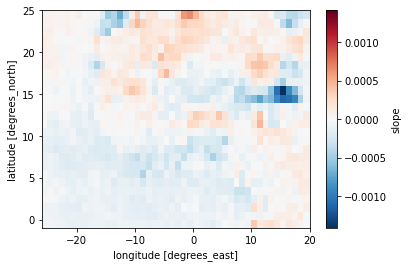

In [98]:
coeffs.plot()


#coeffs.head()

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0007766360860594901, z=-3.360990102157345, Tau=-0.15826330532212884, s=-3277.0, var_s=950065.0, slope=-0.00024404447743382838)